# Import libraries and setup source timeseries


In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
Timeseries='/var/tmp/EURGBP-2016-01.csv'
num_rows=5000000
Output_Directory=u'/var/local/foresight/timeseries'

In [22]:
# Read the timeseries
df = pd.read_csv(Timeseries, sep=',', header=None, names=['pair',"time", "bid", "ask"], usecols=['time', 'bid', 'ask'], parse_dates=["time"], nrows=num_rows, infer_datetime_format=True, index_col=0)

                             bid      ask
time                                     
2016-01-29 20:59:58.077  0.76022  0.76027
2016-01-29 20:59:58.117  0.76021  0.76025
2016-01-29 20:59:58.149  0.76019  0.76025
2016-01-29 20:59:59.009  0.76019  0.76027
2016-01-29 20:59:59.020  0.76022  0.76027


## Extract a short timeseries from the original dataset

Extract a short date range from the original timeseries.  
- Use a period of 1 week, starting from the 2nd week of data


In [30]:
start_date = df.index[0] + pd.DateOffset(weeks=1)
end_date = first_date + pd.DateOffset(weeks=1)
df_1w = df.truncate(before=start_date, after=end_date)
df_1 = df_1w[~df_1w.index.duplicated()]

print("Start time: ", start_date)
print("End time: ", end_date)

Start time:  2016-01-11 00:00:01.352000
End time:  2016-01-18 00:00:01.352000


## Resample the series using a few different resampling approaches
1. Sample every 5 minutes
2. Sample every 15 minutes
3. Sample every 100 ticks
4. Sample every 500 ticks

In [41]:
bid_raw = df_1['bid']
bid_5m = bid_raw.asfreq('5T', method='bfill')
bid_15m = bid_raw.asfreq('15T', method='bfill')
bid_100t = bid_raw[::100]
bid_500t = bid_raw[::500]


print("Length of raw data: ", len(bid_raw))
print("Length of 5min data: ", len(bid_5m))
print("Length of 15min data: ", len(bid_15m))
print("Length of 100tick data: ", len(bid_100t))
print("Length of 500tick data: ", len(bid_500t))


Length of raw data:  873770
Length of 5min data:  2016
Length of 15min data:  672
Length of 100tick data:  8738
Length of 500tick data:  1748


(0, 2000)

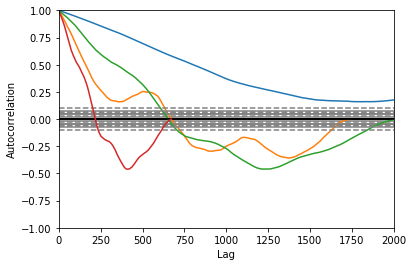

In [60]:
ax = autocorrelation_plot(bid_100t)
autocorrelation_plot(bid_500t,ax=ax)
autocorrelation_plot(bid_5m,ax=ax)
autocorrelation_plot(bid_15m,ax=ax)
ax.set_xlim([0, 2000])

In [70]:
ts_name_100t = 'EURGBP-2016-wk1-100ticks.csv'
outpath_100t = Output_Directory + '/' + ts_name_100t
print(outpath_100t)
bid_100t.to_csv(outpath_100t, index=False)

/var/local/foresight/timeseries/EURGBP-2016-wk1-100ticks.csv


time
2016-01-11 00:00:07.845        NaN
2016-01-11 00:05:07.845   -0.00044
2016-01-11 00:10:07.845    0.00041
2016-01-11 00:15:07.845   -0.00019
2016-01-11 00:20:07.845   -0.00020
2016-01-11 00:25:07.845    0.00003
2016-01-11 00:30:07.845    0.00017
2016-01-11 00:35:07.845    0.00022
2016-01-11 00:40:07.845    0.00007
2016-01-11 00:45:07.845    0.00010
2016-01-11 00:50:07.845    0.00029
2016-01-11 00:55:07.845   -0.00027
2016-01-11 01:00:07.845    0.00008
2016-01-11 01:05:07.845   -0.00025
2016-01-11 01:10:07.845    0.00015
2016-01-11 01:15:07.845    0.00019
2016-01-11 01:20:07.845   -0.00065
2016-01-11 01:25:07.845    0.00089
2016-01-11 01:30:07.845    0.00006
2016-01-11 01:35:07.845    0.00031
Freq: 5T, Name: bid, dtype: float64


(0, 100)

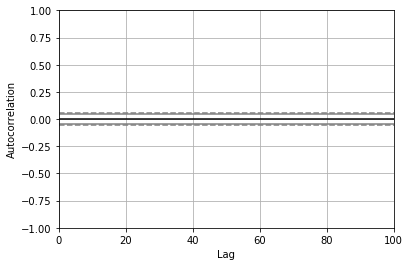

In [53]:
d_bid5 = bid_5m.diff()
print(d_bid5[:20])
ax = autocorrelation_plot(d_bid5)
ax.set_xlim([0, 100])